In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/Data Mining Assignments/Classification
!ls

/content/drive/MyDrive/Colab Notebooks/Data Mining Assignments/Classification
Decision_Tree_Classifier.ipynb
LabWork_2.pdf
Naive_Bayes_Classifier.ipynb
Plots
Run-and-Compare-Classifier-on-UCI-Datasets.ipynb
sampleDataset-1.csv
sampleDataset-2.csv


In [3]:
!pip install ipynb

In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support
from sklearn.datasets import load_iris, load_digits, load_wine
from ipynb.fs.full.Decision_Tree_Classifier import DecisionTree
from ipynb.fs.full.Naive_Bayes_Classifier import NaiveBayesClassifier


plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Algorithm Directory path

In [5]:
# All the datasets are loaded from this directory and
# All the results are stored in this directory
directoryPath = '/content/drive/MyDrive/Colab Notebooks/Data Mining Assignments/Classification/'

## Classification

In [6]:
def classification(X, Y, selectionMeasure = 'gain', discreteThreshold = 15, numOfIterations = 10, numOfFold = 5, testSize = 0.2):
  # kFold = KFold(n_splits = numOfFold)
  YActual = np.array([])
  YPredDTree = np.array([])
  YPredNaiveBayes = np.array([])

  for i in range(numOfIterations):
    XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size= testSize, stratify=Y, random_state = 123 + i)  

  # for trainIndex, testIndex in kFold.split(X):
    # print("TRAIN:", trainIndex, "TEST:", testIndex)
    # XTrain, XTest, YTrain, YTest = X[trainIndex], X[testIndex], Y[trainIndex], Y[testIndex]
    YActual = np.append(YActual, YTest)

    decisionTree = DecisionTree(XTrain, YTrain, selectionMeasure = selectionMeasure,  discreteThreshold = discreteThreshold)
    # print(decisionTree.get_attribute_info())
    YPredDTree = np.append(YPredDTree, decisionTree.predict(XTest))

    naiveBayesClassifier = NaiveBayesClassifier(XTrain, YTrain, discreteThreshold = discreteThreshold)
    YPredNaiveBayes = np.append(YPredNaiveBayes, naiveBayesClassifier.predict(XTest)) 

  # print(set(YActual) - set(YPredNaiveBayes))
  # print(set(YActual) - set(YPredDTree))

  accuracyNaiveBayes = accuracy_score(YActual, YPredNaiveBayes)
  accuracyDTree = accuracy_score(YActual, YPredDTree)

  precisionDTree, recallDTree, f1scoreDTree, _ = precision_recall_fscore_support(YActual, YPredDTree, average='macro')
  precisionNaiveBayes, recallNaiveBayes, f1scoreNaiveBayes, _ = precision_recall_fscore_support(YActual, YPredNaiveBayes, average='macro')

  print("Decision Tree Accuracy : {}".format(accuracyDTree))
  print("Naive Bayes Accuracy : {}\n".format(accuracyNaiveBayes))

  print("Decision Tree Precision : {}".format(precisionDTree))
  print("Naive Bayes Precision : {}\n".format(precisionNaiveBayes))
  
  print("Decision Tree Recall : {}".format(recallDTree))
  print("Naive Bayes Recall : {}\n".format(recallNaiveBayes))
  
  print("Decision Tree F1Score : {}".format(f1scoreDTree))
  print("Naive Bayes F1Score : {}\n".format(f1scoreNaiveBayes))

  dTreeMeasures = [accuracyDTree, precisionDTree, recallDTree, f1scoreDTree ]
  naiveBayesMeasures = [accuracyNaiveBayes, precisionNaiveBayes, recallNaiveBayes, f1scoreNaiveBayes]
  print(dTreeMeasures, naiveBayesMeasures)

  return dTreeMeasures, naiveBayesMeasures
  

In [7]:
def plot_bar_chart(dTreeMeasures, naiveBayesMeasures, dName):
  barWidth = 0.25
  fig = plt.subplots(figsize =(12, 8)) 
    
  # Set position of bar on X axis 
  br1 = np.arange(len(dTreeMeasures)) 
  br2 = [x + barWidth for x in br1] 
  
  plt.title('Dataset: {}'.format(dName), fontsize=20)
  # Make the plot 
  p1 = plt.bar(br1, dTreeMeasures, color ='#778beb', width = barWidth, 
          edgecolor ='grey', label ='Decision Tree') 
  p2 = plt.bar(br2, naiveBayesMeasures, color ='#303952', width = barWidth, 
          edgecolor ='grey', label ='Naive Bayes') 
    
  # Adding Xticks 
  plt.ylim(0,1.2) 
  plt.xlabel('Measure Names', fontweight ='bold', fontsize=20) 
  plt.ylabel('Score', fontweight ='bold', fontsize=20) 
  plt.xticks([r + barWidth for r in range(len(dTreeMeasures))], 
            ['Accuracy', 'Precision', 'Recall', 'F1Score']) 
  
  plt.legend((p1[0], p2[0]), ('Decision Tree' ,'Naive Bayes'), prop={'size': 15})
    
  plt.show() 

In [8]:
def save_bar_chart(dTreeMeasures, naiveBayesMeasures, dName, fileExtension = 'svg'):
  barWidth = 0.25
  fig = plt.subplots(figsize =(12, 8)) 
    
  # Set position of bar on X axis 
  br1 = np.arange(len(dTreeMeasures)) 
  br2 = [x + barWidth for x in br1] 
  
  plt.title('Dataset: {}'.format(dName), fontsize=20)
  # Make the plot 
  p1 = plt.bar(br1, dTreeMeasures, color ='#778beb', width = barWidth, 
          edgecolor ='grey', label ='Decision Tree') 
  p2 = plt.bar(br2, naiveBayesMeasures, color ='#303952', width = barWidth, 
          edgecolor ='grey', label ='Naive Bayes') 
    
  # Adding Xticks  
  plt.ylim(0,1.2)
  plt.xlabel('Measure Names', fontweight ='bold', fontsize=20) 
  plt.ylabel('Score', fontweight ='bold', fontsize=20) 
  plt.xticks([r + barWidth for r in range(len(dTreeMeasures))], 
            ['Accuracy', 'Precision', 'Recall', 'F1Score']) 
  
  plt.legend((p1[0], p2[0]), ('Decision Tree' ,'Naive Bayes'), prop={'size': 15})
    
  plt.savefig('{}/Plots/{}.{}'.format(directoryPath, dName, fileExtension))

## Iris

dataset: iris
instances = 150, features= 4 
Decision Tree Accuracy : 0.94
Naive Bayes Accuracy : 0.9533333333333334

Decision Tree Precision : 0.9407378335949764
Naive Bayes Precision : 0.9534480458850206

Decision Tree Recall : 0.94
Naive Bayes Recall : 0.9533333333333333

Decision Tree F1Score : 0.9401861754802932
Naive Bayes F1Score : 0.9533286661999533

[0.94, 0.9407378335949764, 0.94, 0.9401861754802932] [0.9533333333333334, 0.9534480458850206, 0.9533333333333333, 0.9533286661999533]


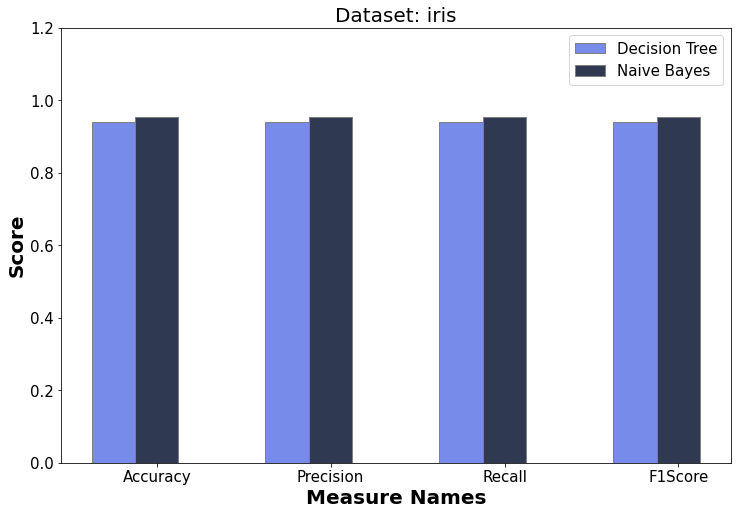

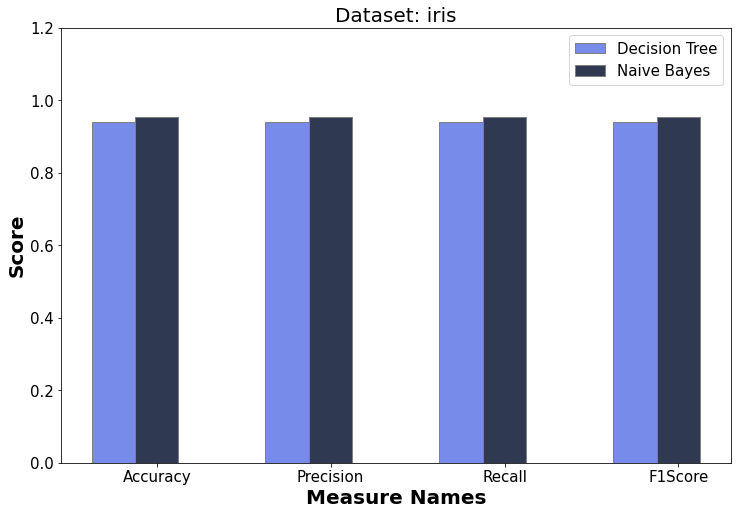

In [ ]:
X, Y = load_iris(return_X_y= True)
Y = np.squeeze(Y)
print('dataset: iris')
# print(X,Y)
print('instances = {}, features= {} '.format(X.shape[0], X.shape[1]))

dTreeMeasures, naiveBayesMeasures = classification(X, Y, selectionMeasure = 'gain', discreteThreshold = 15)
# plot_bar_chart(dTreeMeasures, naiveBayesMeasures, 'iris')
save_bar_chart(dTreeMeasures, naiveBayesMeasures, 'iris', 'svg')
save_bar_chart(dTreeMeasures, naiveBayesMeasures, 'iris', 'png')

## Wine

dataset: wine
instances = 178, features= 13 
Decision Tree Accuracy : 0.9472222222222222
Naive Bayes Accuracy : 0.9777777777777777

Decision Tree Precision : 0.9477301095876948
Naive Bayes Precision : 0.9771082516108308

Decision Tree Recall : 0.9508730158730159
Naive Bayes Recall : 0.9797619047619047

Decision Tree F1Score : 0.9489338258786632
Naive Bayes F1Score : 0.9782694852521344

[0.9472222222222222, 0.9477301095876948, 0.9508730158730159, 0.9489338258786632] [0.9777777777777777, 0.9771082516108308, 0.9797619047619047, 0.9782694852521344]


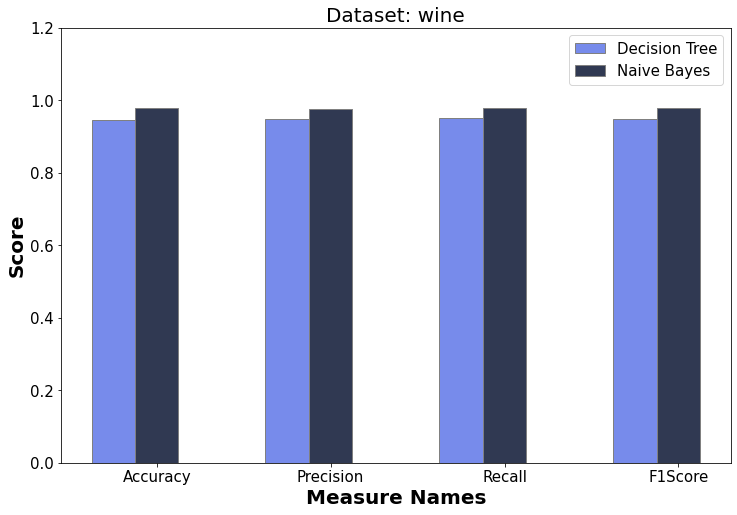

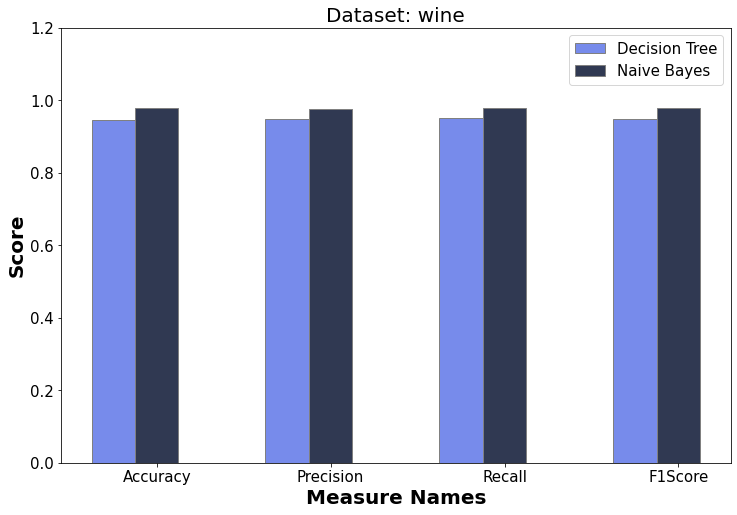

In [9]:
X, Y = load_wine(return_X_y= True)
Y = np.squeeze(Y)
print('dataset: wine')
# print(X,Y)
print('instances = {}, features= {} '.format(X.shape[0], X.shape[1]))

dTreeMeasures, naiveBayesMeasures = classification(X, Y, selectionMeasure = 'gain', discreteThreshold = 15)
# plot_bar_chart(dTreeMeasures, naiveBayesMeasures)
save_bar_chart(dTreeMeasures, naiveBayesMeasures, 'wine', 'svg')
save_bar_chart(dTreeMeasures, naiveBayesMeasures, 'wine', 'png')

## Australian

dataset: australian
instances = 690, features= 14 
Decision Tree Accuracy : 0.8072463768115942
Naive Bayes Accuracy : 0.7615942028985507

Decision Tree Precision : 0.8047048890935605
Naive Bayes Precision : 0.7859137751224082

Decision Tree Recall : 0.804279327230147
Naive Bayes Recall : 0.7410581222056631

Decision Tree F1Score : 0.8044851036269429
Naive Bayes F1Score : 0.743872244138797

[0.8072463768115942, 0.8047048890935605, 0.804279327230147, 0.8044851036269429] [0.7615942028985507, 0.7859137751224082, 0.7410581222056631, 0.743872244138797]


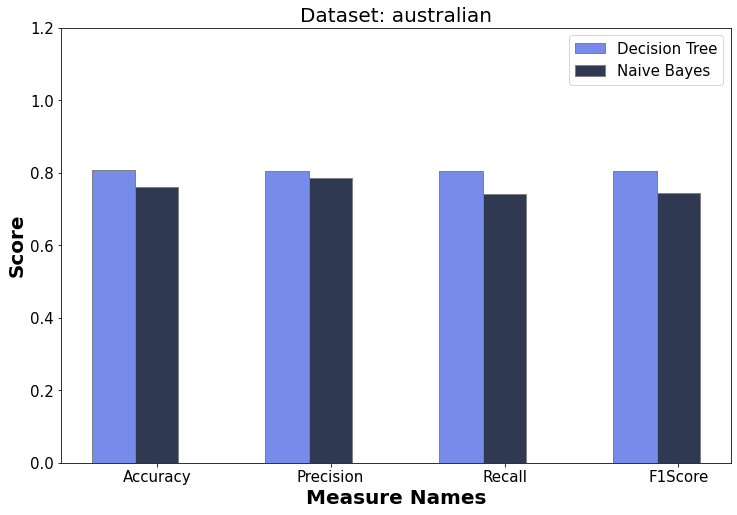

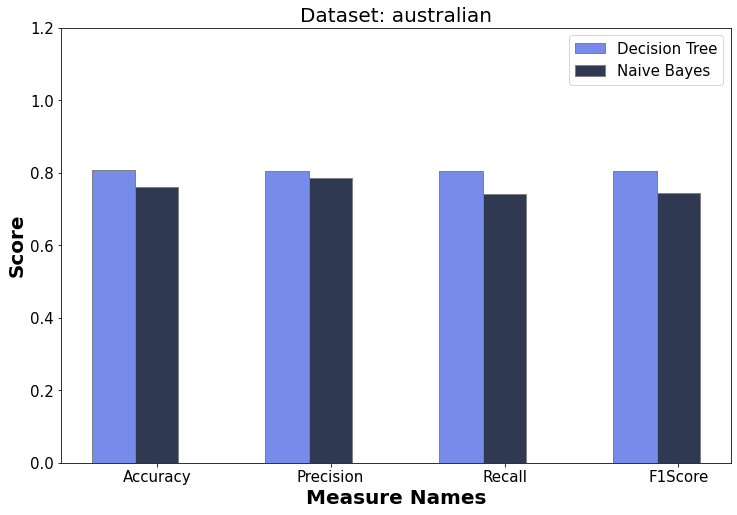

In [ ]:
df = pd.read_csv ('/content/drive/My Drive/Thesis/Datasets/Australian/australian.dat', sep=r'\s+',header=None)
X_df, Y_df = df.iloc[:,:-1], df.iloc[:,-1]
print('dataset: australian')
# print(X_df.head())
# print(Y_df.head())
print('instances = {}, features= {} '.format(X_df.shape[0], X_df.shape[1]))

X = X_df.fillna(X_df.mean()).to_numpy() 
Y = np.squeeze(Y_df.to_numpy())

dTreeMeasures, naiveBayesMeasures = classification(X, Y, selectionMeasure = 'gain', discreteThreshold = 15)
# plot_bar_chart(dTreeMeasures, naiveBayesMeasures)
save_bar_chart(dTreeMeasures, naiveBayesMeasures, 'australian', 'svg')
save_bar_chart(dTreeMeasures, naiveBayesMeasures, 'australian', 'png')

## Dermatology

dataset: dermatology
instances = 366, features= 34 
Decision Tree Accuracy : 0.9175675675675675
Naive Bayes Accuracy : 0.9824324324324324

Decision Tree Precision : 0.8867887036889087
Naive Bayes Precision : 0.9804529299942145

Decision Tree Recall : 0.886207729468599
Naive Bayes Recall : 0.9816666666666666

Decision Tree F1Score : 0.8864453929993639
Naive Bayes F1Score : 0.9802700111067421

[0.9175675675675675, 0.8867887036889087, 0.886207729468599, 0.8864453929993639] [0.9824324324324324, 0.9804529299942145, 0.9816666666666666, 0.9802700111067421]


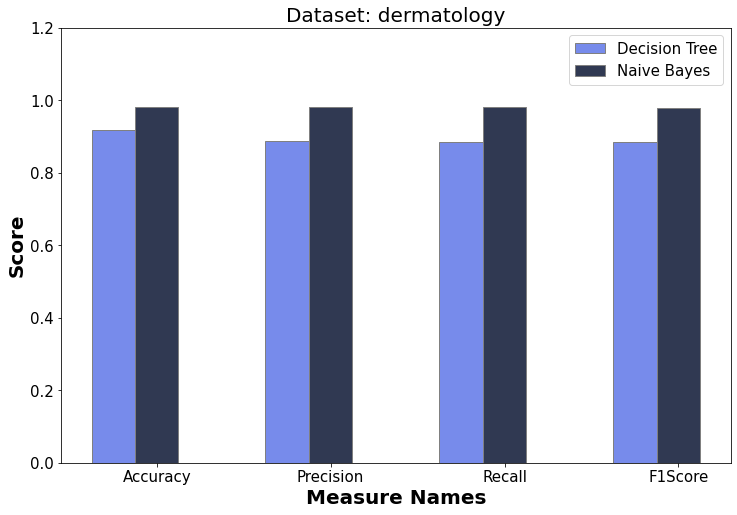

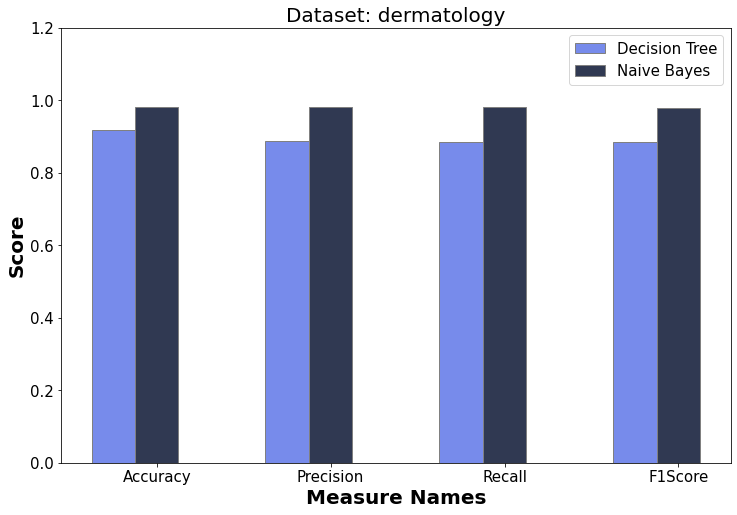

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Thesis/Datasets/Dermatology/dermatology.data', sep=",",header=None)
df = df.replace(['?'], np.nan).astype('float64')
X_df = df.iloc[:,:-1]
Y_df = df.iloc[:,-1]
print('dataset: dermatology')
# print(X_df.head())
# print(Y_df.head())
print('instances = {}, features= {} '.format(X_df.shape[0], X_df.shape[1]))

X = X_df.fillna(X_df.mean()).to_numpy() 
Y = np.squeeze(Y_df.to_numpy())

dTreeMeasures, naiveBayesMeasures = classification(X, Y, selectionMeasure = 'gain', discreteThreshold = 15)
# plot_bar_chart(dTreeMeasures, naiveBayesMeasures)
save_bar_chart(dTreeMeasures, naiveBayesMeasures, 'dermatology', 'svg')
save_bar_chart(dTreeMeasures, naiveBayesMeasures, 'dermatology', 'png')

## Parkinsons

dataset: parkinsons
instances = 195, features= 22 
Decision Tree Accuracy : 0.8692307692307693
Naive Bayes Accuracy : 0.7076923076923077

Decision Tree Precision : 0.8256167233578812
Naive Bayes Precision : 0.716715820518222

Decision Tree Recall : 0.8400000000000001
Naive Bayes Recall : 0.7837931034482759

Decision Tree F1Score : 0.8323089764018514
Naive Bayes F1Score : 0.6920114162210091

[0.8692307692307693, 0.8256167233578812, 0.8400000000000001, 0.8323089764018514] [0.7076923076923077, 0.716715820518222, 0.7837931034482759, 0.6920114162210091]


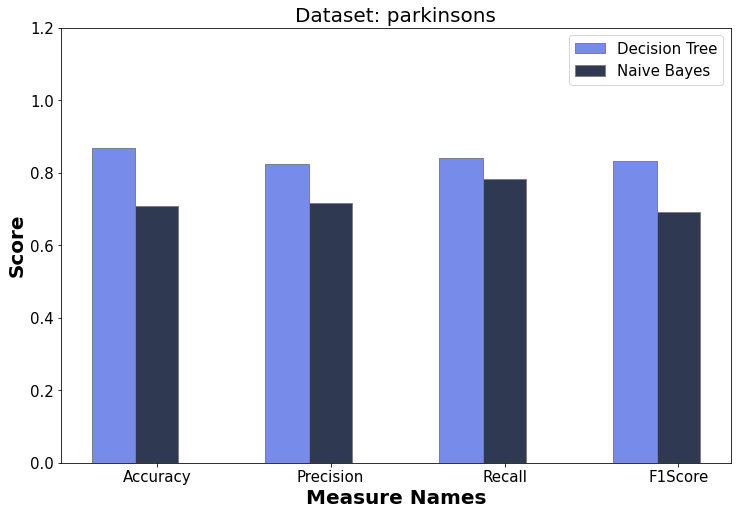

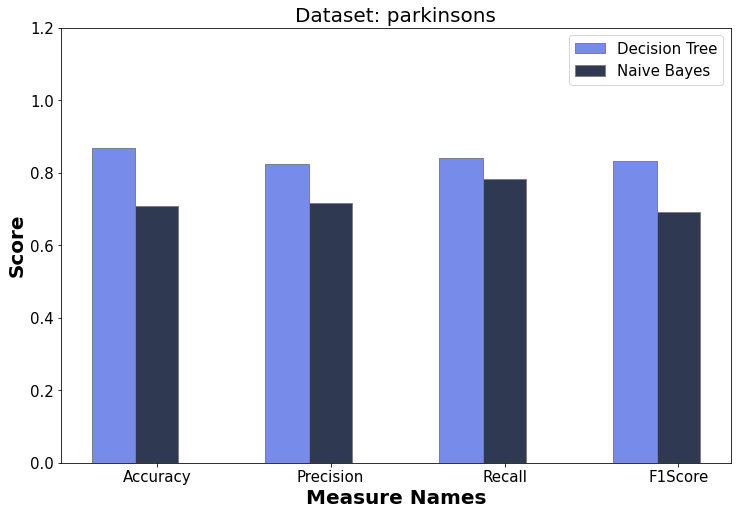

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Thesis/Datasets/Parkinsons/parkinsons.data', sep=",",header=None)
df = df.iloc[1:, 1:] #removing first column and first row
X_df = df.iloc[:,[i for i in range(len(df.columns)) if i!=16]]
Y_df = df.iloc[:,16] #17th column contains label
X_df = X_df.astype('float64')
print('dataset: parkinsons')
# print(X_df.head())
# print(Y_df.head())
print('instances = {}, features= {} '.format(X_df.shape[0], X_df.shape[1]))

X = X_df.fillna(X_df.mean()).to_numpy() 
Y = np.squeeze(Y_df.to_numpy())

dTreeMeasures, naiveBayesMeasures = classification(X, Y, selectionMeasure = 'gain', discreteThreshold = 15)
# plot_bar_chart(dTreeMeasures, naiveBayesMeasures)
save_bar_chart(dTreeMeasures, naiveBayesMeasures, 'parkinsons', 'svg')
save_bar_chart(dTreeMeasures, naiveBayesMeasures, 'parkinsons', 'png')

## Sonar

dataset: sonar
instances = 208, features= 60 
Decision Tree Accuracy : 0.7071428571428572
Naive Bayes Accuracy : 0.669047619047619

Decision Tree Precision : 0.7064957264957265
Naive Bayes Precision : 0.6894690460453844

Decision Tree Recall : 0.7059090909090909
Naive Bayes Recall : 0.6759090909090909

Decision Tree F1Score : 0.7061015502773431
Naive Bayes F1Score : 0.6648506524447302

[0.7071428571428572, 0.7064957264957265, 0.7059090909090909, 0.7061015502773431] [0.669047619047619, 0.6894690460453844, 0.6759090909090909, 0.6648506524447302]


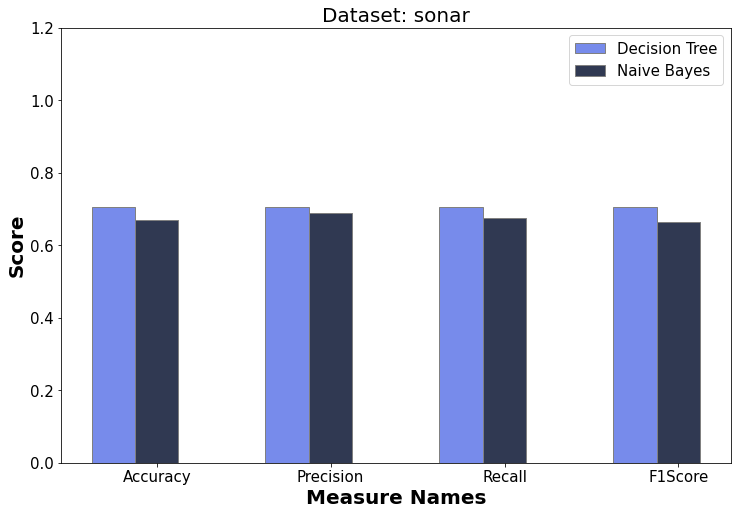

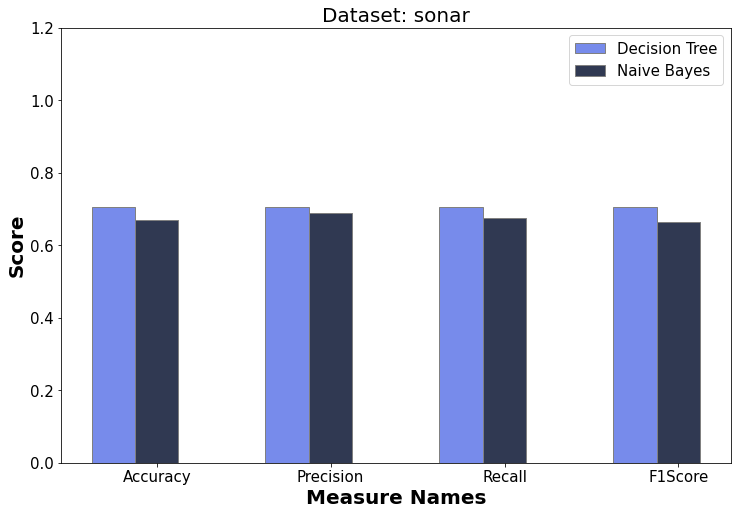

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Thesis/Datasets/Sonar/sonar.all-data', sep=",",header=None)
X_df = df.iloc[:,:-1]
Y_df = df.iloc[:,-1]
print('dataset: sonar')
# print(X_df.head())
# print(Y_df.head())
print('instances = {}, features= {} '.format(X_df.shape[0], X_df.shape[1]))

X = X_df.fillna(X_df.mean()).to_numpy() 
Y = np.squeeze(Y_df.to_numpy())

dTreeMeasures, naiveBayesMeasures = classification(X, Y, selectionMeasure = 'gain', discreteThreshold = 15)
# plot_bar_chart(dTreeMeasures, naiveBayesMeasures)
save_bar_chart(dTreeMeasures, naiveBayesMeasures, 'sonar', 'svg')
save_bar_chart(dTreeMeasures, naiveBayesMeasures, 'sonar', 'png')

## Heart

dataset: heart
instances = 270, features= 13 
Decision Tree Accuracy : 0.7407407407407407
Naive Bayes Accuracy : 0.837037037037037

Decision Tree Precision : 0.7380952380952381
Naive Bayes Precision : 0.8358710255261979

Decision Tree Recall : 0.74
Naive Bayes Recall : 0.8333333333333334

Decision Tree F1Score : 0.7386759581881532
Naive Bayes F1Score : 0.8344112399643175

[0.7407407407407407, 0.7380952380952381, 0.74, 0.7386759581881532] [0.837037037037037, 0.8358710255261979, 0.8333333333333334, 0.8344112399643175]


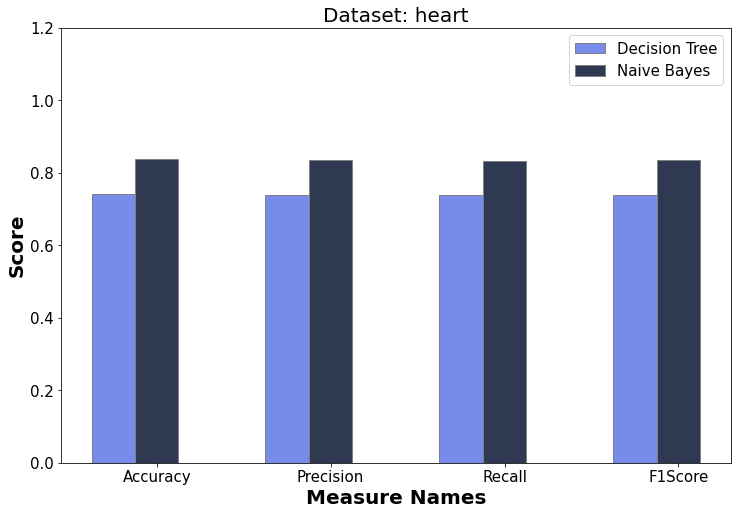

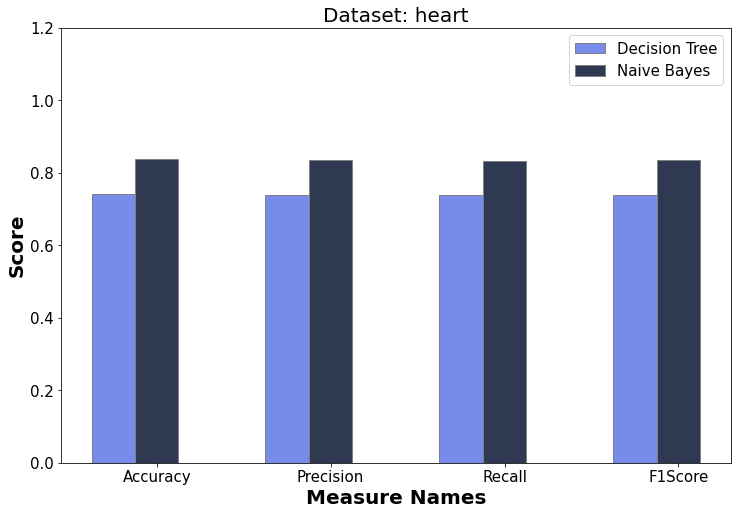

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Thesis/Datasets/Heart/heart.dat', sep= " ",header=None)
X_df = df.iloc[:,:-1]
Y_df = df.iloc[:,-1]
print('dataset: heart')
# print(X_df.head())
# print(Y_df.head())
print('instances = {}, features= {} '.format(X_df.shape[0], X_df.shape[1]))

X = X_df.fillna(X_df.mean()).to_numpy() 
Y = np.squeeze(Y_df.to_numpy())

dTreeMeasures, naiveBayesMeasures = classification(X, Y, selectionMeasure = 'gain', discreteThreshold = 15)
# plot_bar_chart(dTreeMeasures, naiveBayesMeasures)
save_bar_chart(dTreeMeasures, naiveBayesMeasures, 'heart', 'svg')
save_bar_chart(dTreeMeasures, naiveBayesMeasures, 'heart', 'png')

## Segmentation

dataset: segmentation
instances = 2310, features= 19 
Decision Tree Accuracy : 0.9647186147186148
Naive Bayes Accuracy : 0.7941558441558442

Decision Tree Precision : 0.9647866439121965
Naive Bayes Precision : 0.8162374319651969

Decision Tree Recall : 0.9647186147186145
Naive Bayes Recall : 0.7941558441558442

Decision Tree F1Score : 0.9647317808578274
Naive Bayes F1Score : 0.7713487489963315

[0.9647186147186148, 0.9647866439121965, 0.9647186147186145, 0.9647317808578274] [0.7941558441558442, 0.8162374319651969, 0.7941558441558442, 0.7713487489963315]


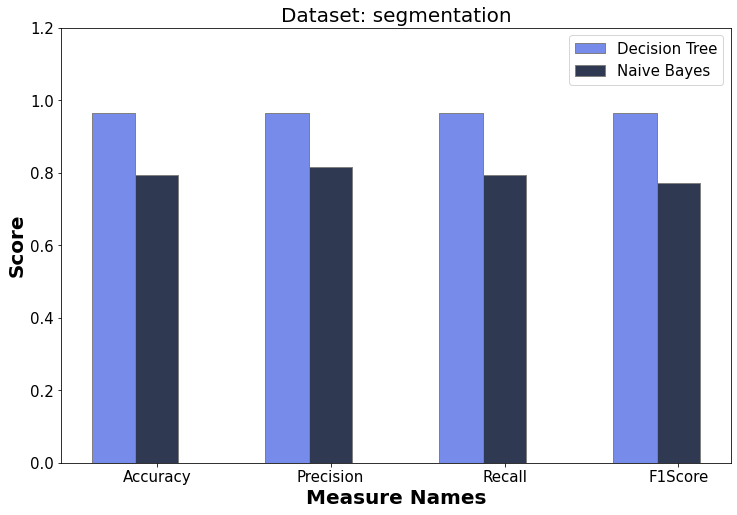

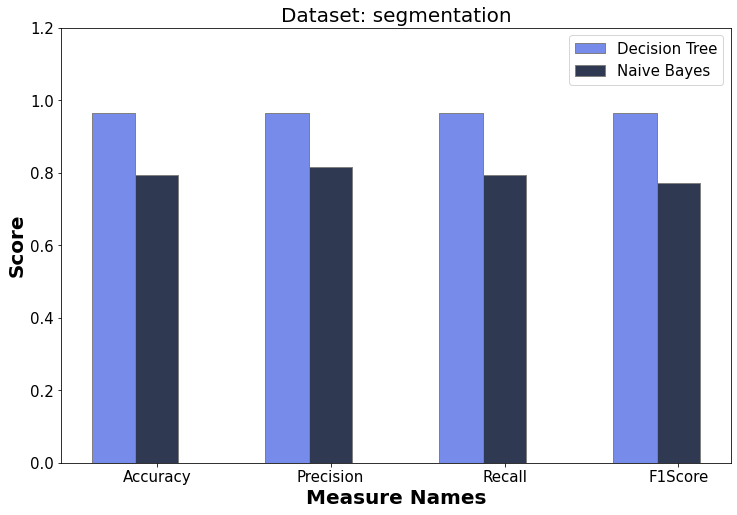

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Thesis/Datasets/Segmentation/segment.dat', sep= r'\s+',header=None)
X_df = df.iloc[:,:-1]
Y_df = df.iloc[:,-1]
print('dataset: segmentation')
# print(X_df.head())
# print(Y_df.head())
print('instances = {}, features= {} '.format(X_df.shape[0], X_df.shape[1]))

X = X_df.fillna(X_df.mean()).to_numpy() 
Y = np.squeeze(Y_df.to_numpy())

dTreeMeasures, naiveBayesMeasures = classification(X, Y, selectionMeasure = 'gain', discreteThreshold = 15)
# plot_bar_chart(dTreeMeasures, naiveBayesMeasures)
save_bar_chart(dTreeMeasures, naiveBayesMeasures, 'segmentation', 'svg')
save_bar_chart(dTreeMeasures, naiveBayesMeasures, 'segmentation', 'png')

## Ecoli

dataset: ecoli
instances = 336, features= 7 


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Tree Accuracy : 0.8073529411764706
Naive Bayes Accuracy : 0.8544117647058823

Decision Tree Precision : 0.562424228147107
Naive Bayes Precision : 0.6375576836783734

Decision Tree Recall : 0.5201785014554411
Naive Bayes Recall : 0.6280620241827138

Decision Tree F1Score : 0.5384054407701311
Naive Bayes F1Score : 0.631862928257815

[0.8073529411764706, 0.562424228147107, 0.5201785014554411, 0.5384054407701311] [0.8544117647058823, 0.6375576836783734, 0.6280620241827138, 0.631862928257815]


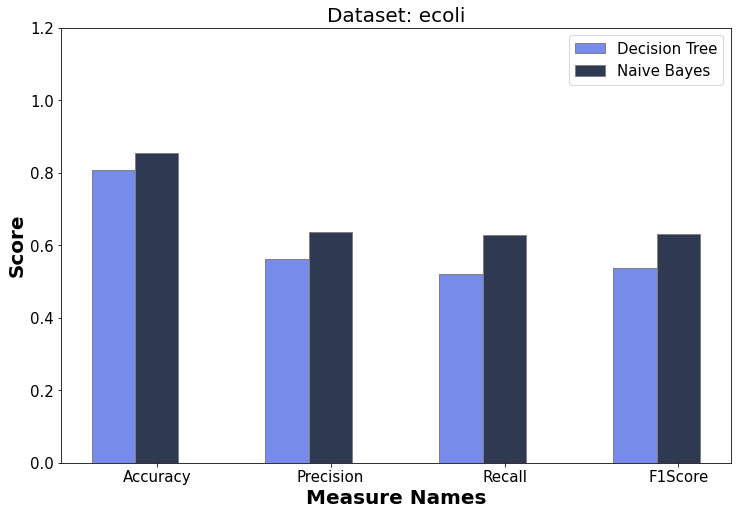

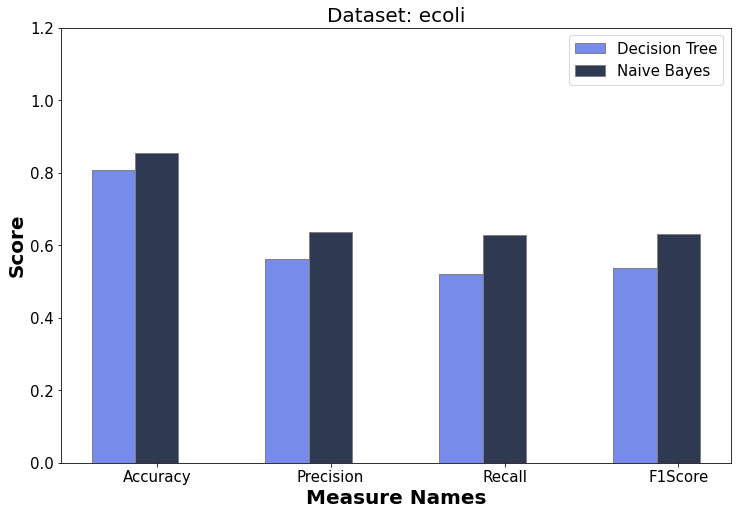

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Thesis/Datasets/Ecoli/ecoli.data', sep= r'\s+',header=None)
X_df = df.iloc[:,1:-1]
Y_df = df.iloc[:,-1]
print('dataset: ecoli')
# print(X_df.head())
# print(Y_df.head())
print('instances = {}, features= {} '.format(X_df.shape[0], X_df.shape[1]))

X = X_df.fillna(X_df.mean()).to_numpy() 
Y = np.squeeze(Y_df.to_numpy())

dTreeMeasures, naiveBayesMeasures = classification(X, Y, selectionMeasure = 'gain', discreteThreshold = 15)
# plot_bar_chart(dTreeMeasures, naiveBayesMeasures)
save_bar_chart(dTreeMeasures, naiveBayesMeasures, 'ecoli', 'svg')
save_bar_chart(dTreeMeasures, naiveBayesMeasures, 'ecoli', 'png')

## German

dataset: german
instances = 1000, features= 20 
Decision Tree Accuracy : 0.6775
Naive Bayes Accuracy : 0.755

Decision Tree Precision : 0.6187586047440384
Naive Bayes Precision : 0.7066356845768611

Decision Tree Recall : 0.6210714285714285
Naive Bayes Recall : 0.6854761904761906

Decision Tree F1Score : 0.6198232974051614
Naive Bayes F1Score : 0.6934802626311154

[0.6775, 0.6187586047440384, 0.6210714285714285, 0.6198232974051614] [0.755, 0.7066356845768611, 0.6854761904761906, 0.6934802626311154]


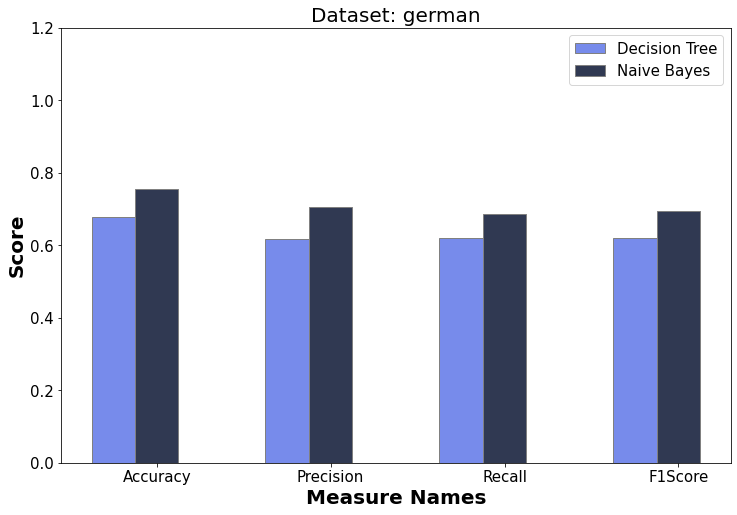

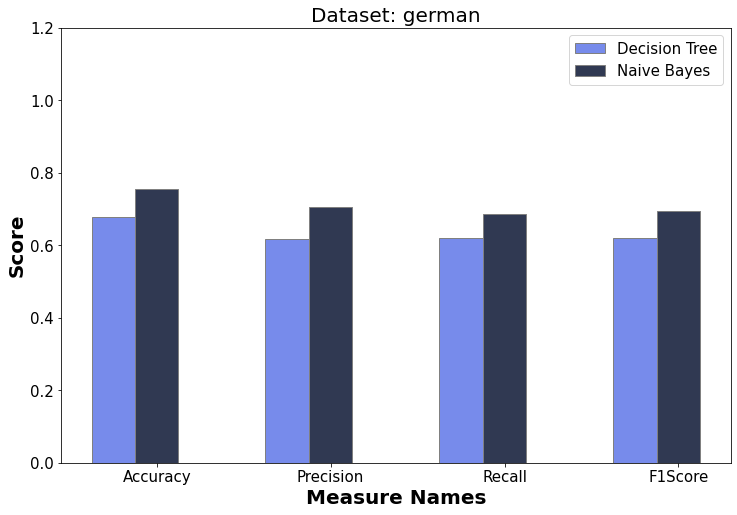

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Thesis/Datasets/German/german.data', sep=r'\s+',header=None)
df = df.replace(['?'], np.nan)
X_df = df.iloc[:,:-1]
Y_df = df.iloc[:,-1]
print('dataset: german')
# print(X_df.head())
# print(Y_df.head())
print('instances = {}, features= {} '.format(X_df.shape[0], X_df.shape[1]))

X = X_df.fillna(X_df.mean()).to_numpy() 
Y = np.squeeze(Y_df.to_numpy())

dTreeMeasures, naiveBayesMeasures = classification(X, Y, selectionMeasure = 'gain', discreteThreshold = 15)
# plot_bar_chart(dTreeMeasures, naiveBayesMeasures)
save_bar_chart(dTreeMeasures, naiveBayesMeasures, 'german', 'svg')
save_bar_chart(dTreeMeasures, naiveBayesMeasures, 'german', 'png')